<a href="https://colab.research.google.com/github/DiegoDuran03/1/blob/main/A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file='https://raw.githubusercontent.com/tec03/Datasets/main/datasets/antropometria-dataset.csv'

df = pd.read_csv(file)

df_filtered = df[['peso', 'cintura', 'sexo']].dropna()

Resultados para Hombres:
Pendiente (B1): 0.9557736731097394
Intercepto (B0): -16.501454915572467


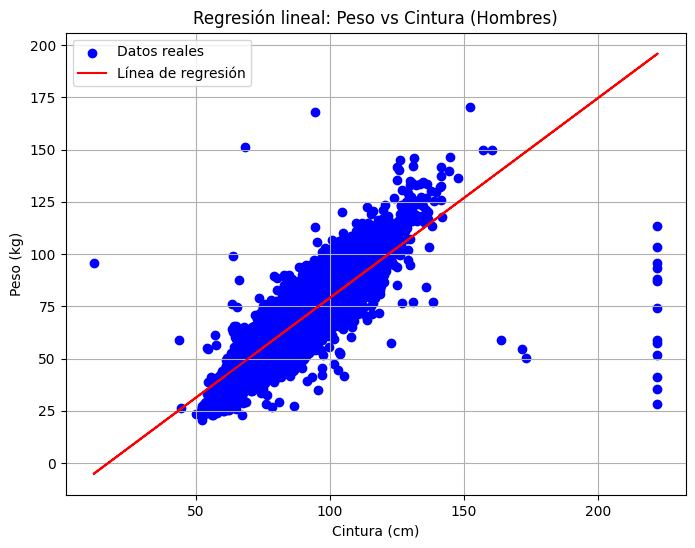

Resultados para Mujeres:
Pendiente (B1): 0.7367878416907176
Intercepto (B0): -2.185157089170737


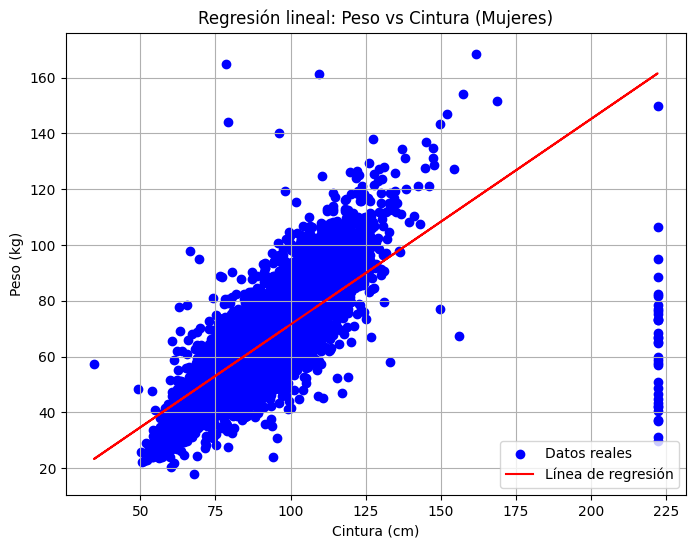

In [ ]:
df_filtered = df[['peso', 'cintura', 'sexo']].dropna()


df_hombres = df_filtered[df_filtered['sexo'] == 1]
df_mujeres = df_filtered[df_filtered['sexo'] == 2]

def realizar_regresion(df, sexo):
    X = df[['cintura']]
    y = df['peso']

    modelo = LinearRegression()
    modelo.fit(X, y)

    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_

    y_pred = modelo.predict(X)

    residuos = y - y_pred

    print(f"Resultados para {sexo}:")
    print(f"Pendiente (B1): {pendiente}")
    print(f"Intercepto (B0): {intercepto}")

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    plt.xlabel('Cintura (cm)')
    plt.ylabel('Peso (kg)')
    plt.title(f'Regresión lineal: Peso vs Cintura ({sexo})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return pendiente, intercepto, residuos

pendiente_h, intercepto_h, residuos_h = realizar_regresion(df_hombres, "Hombres")

pendiente_m, intercepto_m, residuos_m = realizar_regresion(df_mujeres, "Mujeres")


##Conclusion

La relación entre el peso y la cintura es positiva tanto para hombres como para mujeres,lo que indica que a medida que aumenta la cintura, también lo hace el peso. Sin embargo,la pendiente es mayor en hombres que en mujeres, lo que sugiere que el aumento del peso en función de la cintura es más pronunciado en hombres.

In [ ]:
print(df.columns)

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')


In [ ]:
df_filtered = df[['peso', 'cadera']].dropna()

X = df_filtered[['peso']]
y = df_filtered['cadera']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

mediana_ajustada = np.median(y_pred)
print("Mediana de los valores ajustados:", mediana_ajustada)

Mediana de los valores ajustados: 97.18551705265611


In [ ]:
correlacion_peso_edad = df['peso'].corr(df['edad'])
correlacion_peso_edad

0.3170495816571554

In [ ]:
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

df_filtered = df[['sistol', 'diastol']].dropna()

X = df_filtered['sistol']
y = df_filtered['diastol']

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

dw_value = durbin_watson(modelo.resid)
dw_value

1.7463985152850534

In [ ]:
df_filtered = df[['diastol', 'sistol', 'edad', 'peso', 'cintura']].dropna()

X = df_filtered[['sistol', 'edad', 'peso', 'cintura']]
y = df_filtered['diastol']

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

b3_value = modelo.params['peso']
b3_value

0.08254633303320788

In [ ]:
df_filtered = df[['peso', 'cadera']].dropna()

X = df_filtered[['peso']]
y = df_filtered['cadera']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

residuos = y - y_pred

mediana_residuos = np.median(residuos)
mediana_residuos


-0.6495739811777241